In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Problem - 1**

## **Data Exploration and Understanding:**

**Dataset Overview:**
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/WHR-2024-5CS037.csv')
print("First 10 rows of Dataset:\n")
pd.DataFrame(df)

First 10 rows of Dataset:



,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [ ]:
#.shape[0] returns number of rows
total_rows = df.shape[0]
#.shape[1] returns number of columns
total_columns = df.shape[1]
print("Total number of rows",total_rows)
print("Total number of columns",total_columns)

Total number of rows 143
Total number of columns 9


In [ ]:
# .dtypes returns series of columns as index and datatype of each column as value
col_with_dt = df.dtypes
print("Column with their data types:\n",col_with_dt)


Column with their data types:
 Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


**Basic Statistics:**
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.

In [ ]:
score_mean = df['score'].mean()
score_median = df['score'].median()
score_std = df['score'].std()
print("Mean of Score column:",score_mean)
print("Median of Score column:",score_median)
print("Standard Deviation of Score column:",score_std)

Mean of Score column: 5.52758041958042
Median of Score column: 5.785
Standard Deviation of Score column: 1.1707165099442995


In [ ]:
highest_happiness_country = df.loc[df['score'].idxmax(), 'Country name']
lowest_happiness_country = df.loc[df['score'].idxmin(), 'Country name']
print("Country with highest happiness score:",highest_happiness_country)
print("Country with lowest happiness score:",lowest_happiness_country)

Country with highest happiness score: Finland
Country with lowest happiness score: Afghanistan


**Missing Values:**
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
missing_values_in_dataset = df.isnull().sum()
print("Total count of missing values in each column:\n",missing_values_in_dataset)

Total count of missing values in each column:
 Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


**Filtering and Sorting:**
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [ ]:
filtered_df = df[df['score'] > 7.5]
print("Filtered Dataset:\n")
filtered_df

Filtered Dataset:



,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [ ]:
sorted_filtered_df = filtered_df.sort_values(by='Log GDP per capita',ascending=False)
print("Sorted Filtered Dataset:\n")
sorted_filtered_df

Sorted Filtered Dataset:



,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


**Adding New Columns:**
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [ ]:


# Define the corresponding categories
categories = ['Low', 'Medium', 'High']

# Create the new column using np.select
df['Happiness Category'] = pd.cut(df['score'], bins=[0, 4, 6, float('inf')], labels=categories)
df


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102,Low
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068,Low
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


## **Data Visualizations:**

1. **Bar Plot**: Plot the top 10 happiest countries by Score using a bar chart.

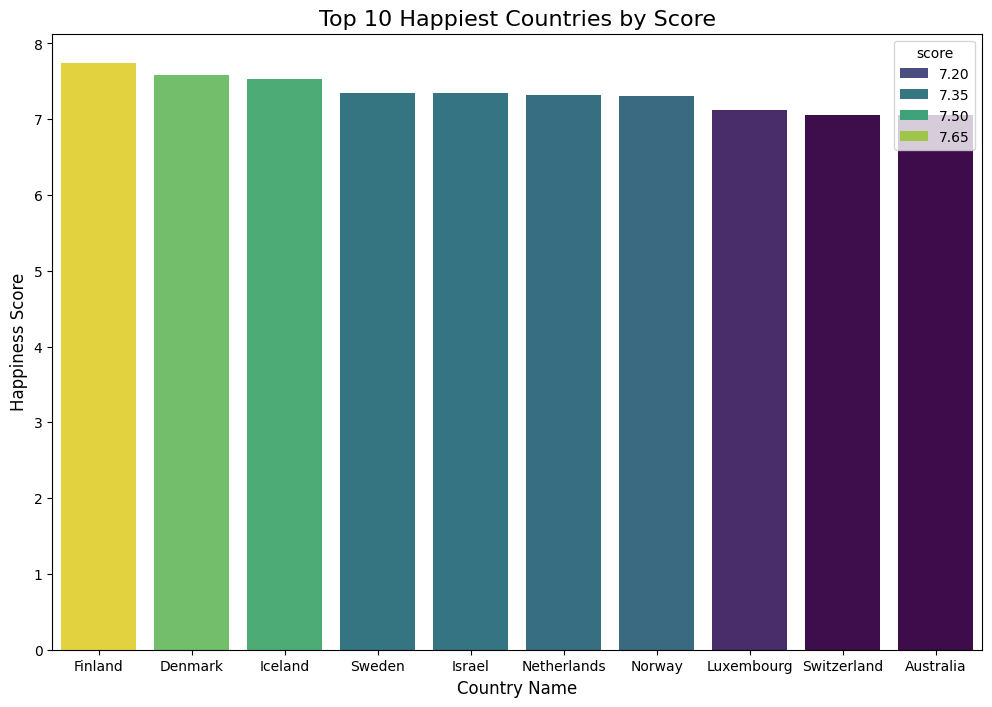

In [ ]:
top_10_happiest_country = df.sort_values(by='score', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12,8))
sns.barplot(y='score', x='Country name',hue = 'score' ,data=top_10_happiest_country, palette='viridis')

# Adding labels and title
plt.title('Top 10 Happiest Countries by Score', fontsize=16)
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('Country Name', fontsize=12)
plt.show()

2. **Line Plot**: Plot the top 10 unhappiest countries by Score using a Line chart.

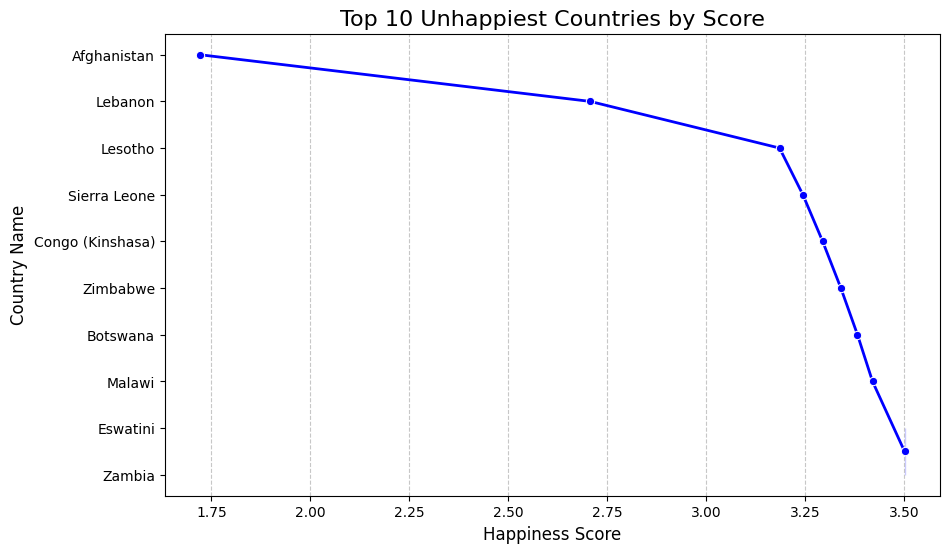

In [ ]:
top_10_unhappiest_country = df.sort_values(by='score', ascending=True).head(10)

plt.figure(figsize=(10, 6))
sns.lineplot(x='score', y='Country name', data=top_10_unhappiest_country, marker='o', color='b', linewidth=2)

# Adding labels and title
plt.title('Top 10 Unhappiest Countries by Score', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Country Name', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Optional grid for clarity
plt.show()

3. **Histogram:** Plot a histogram for the Score column to show its distribution and also interpret.

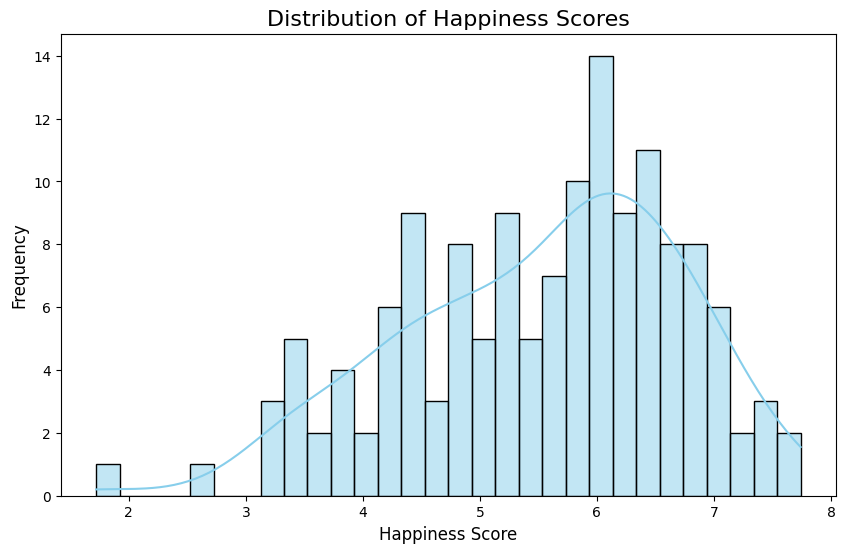

In [ ]:


plt.figure(figsize=(10,6))
sns.histplot(df['score'], bins=30, kde=True, color='skyblue')

# Adding labels and title
plt.title('Distribution of Happiness Scores', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


Shape of Distribution: The histogram shows a right-skewed distribution, meaning that most countries have happiness scores on the lower to medium range (below 6), with fewer countries having very high scores (above 7).
Central Tendency: The peak of the histogram lies between 5 and 6, suggesting that this is the most common happiness score range among countries.
Spread: There is a noticeable variation in happiness scores, indicating that countries' happiness levels vary widely.
Outliers: A few countries, such as Finland and Denmark, have significantly higher happiness scores, which stand out from the majority.

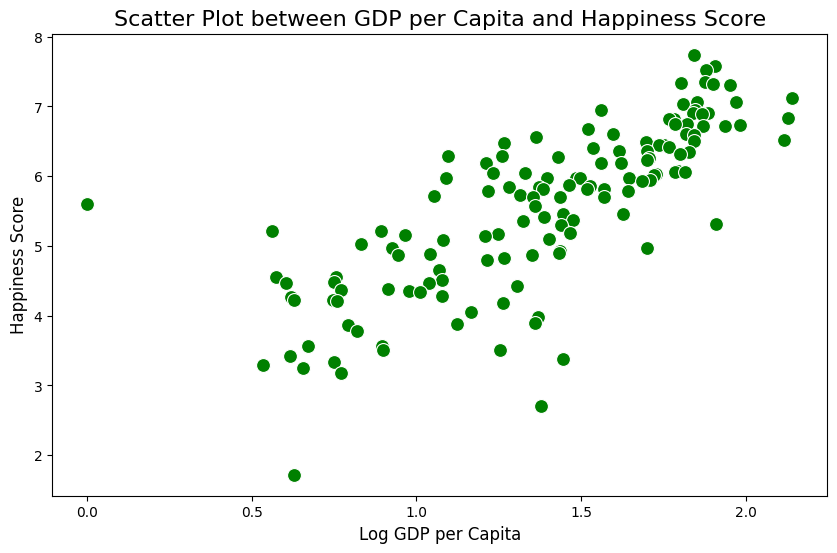

In [ ]:
# Plotting the scatter plot between GDP per Capita and Score
plt.figure(figsize=(10,6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, color='green', s=100)

# Adding labels and title
plt.title('Scatter Plot between GDP per Capita and Happiness Score', fontsize=16)
plt.xlabel('Log GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Show the plot
plt.show()

# **Problem - 2**

## **Task - 1** - Setup Task - Preparing the South-Asia Dataset:

1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]

south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Save the filtered dataset to a new CSV file,, index chaindeina so false
south_asia_df.to_csv('south_asia_happiness_scores.csv', index=False)

print(south_asia_df.head())

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115                1.783             Medium  
107                      0.074

## **Task - 2** - Composite Score Ranking:

**Tasks:**
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

In [ ]:
south_asia_df = pd.read_csv('/content/south_asia_happiness_scores.csv')
south_asia_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [ ]:
south_asia_df['Composite Score'] = (south_asia_df['Log GDP per capita']*0.40 + south_asia_df['Social support']*0.30+0.30* south_asia_df['Healthy life expectancy'])
south_asia_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


In [ ]:
sorted_south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)
sorted_south_asia_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


<ipython-input-20-155cab481894>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country name', y='Composite Score', data=top_5_countries, palette='viridis')


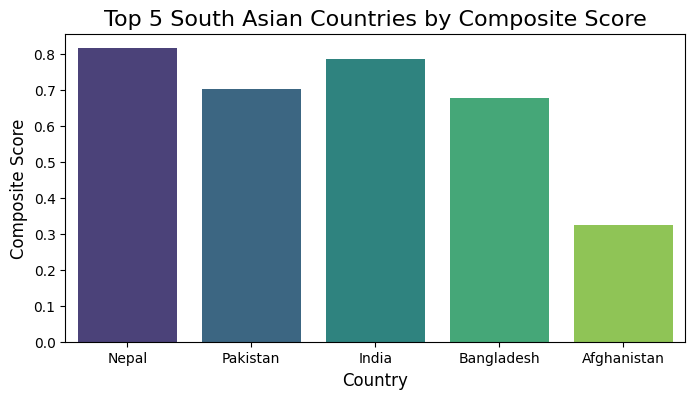

In [ ]:
top_5_countries = south_asia_df[['Country name', 'Composite Score']].head(5)

# Plotting the vertical bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='Country name', y='Composite Score', data=top_5_countries, palette='viridis')

# Adding labels and title
plt.title('Top 5 South Asian Countries by Composite Score', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Composite Score', fontsize=12)

# Rotate x-axis labels for better visibility
# plt.xticks(rotation=45)

# Show the plot
plt.show()

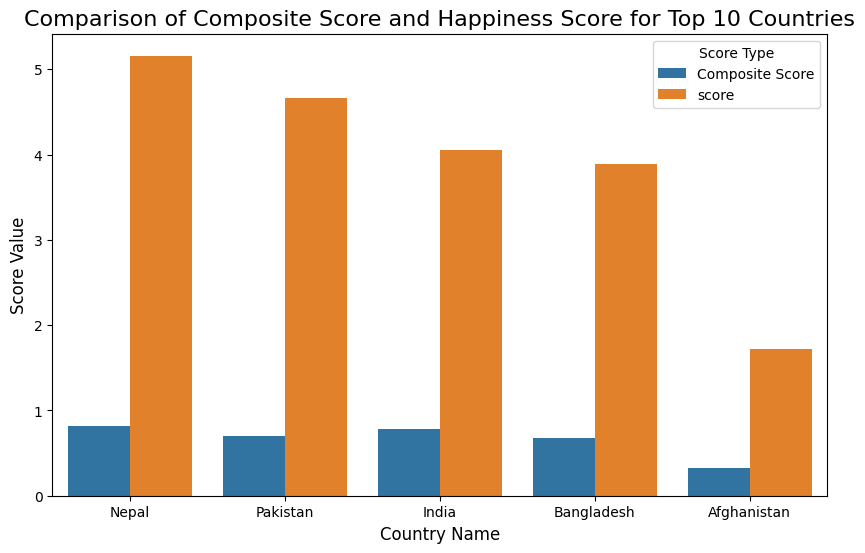

In [ ]:
top_10_countries = south_asia_df[['Country name', 'Composite Score', 'score']].head(10)

top_10_countries_melted = pd.melt(top_10_countries, id_vars=['Country name'],
                                  value_vars=['Composite Score', 'score'],
                                  var_name='Score Type', value_name='Score Value')

# Plotting with Seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='Score Value', hue='Score Type', data=top_10_countries_melted)

# Adding labels and title
plt.title('Comparison of Composite Score and Happiness Score for Top 10 Countries', fontsize=16)
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('Score Value', fontsize=12)


# Show the plot
plt.show()

# Task - 3 - Outlier Detection:

**Tasks:**
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.